# Model fitting exercise
 - fitting a forgetting curve by Murdock (1961)
 - code adapted from Myung (2003)'s matlab code
 - using Nelder-Mead optimization algoritm in scipy


> Hyungwook Yim 20220429

In [91]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import pandas as pd
import os

In [170]:
def change_dtype(lst):
    temp=[]
    for element in lst:
        if(type(element)==str):
            element=float(element)
            if element<1000 and element-element*1000//1000>0:
                element*=1000
        else:
            if element<1000:
                element*=1000
        temp.append(element)
    print(temp)
    return temp
def change_type(x):
    if type(x)==str:
        return float(x.strip(' []'))
    else:
        return x
            

In [164]:
df=pd.read_csv("Korea Republic.csv")
df
df.iloc[4][2:].astype(numpy.float64).mean()

36.09

In [182]:
class country_info:
    def __init__(self,df): # 각 나라의 기본 내용 저장
        self.name=df.columns[0] #나라 이름
        print(self.name)
        self.plasitc_production=change_dtype(list(df.iloc[0])[2:]) #플라스틱 생산량
        self.plasitc_consumption=change_dtype(list(df.iloc[1])[2:]) #플라스틱 소모량
        print("produc : ",self.plasitc_production, "cnsmpt : ",self.plasitc_consumption)
        self.population=numpy.array([change_type(x) for x in df.iloc[2][2:]]).mean() # 평균 인구수
        self.income_mean=numpy.array([change_type(x) for x in df.iloc[4][2:]]).mean()  # 1인당 수익의 평균
        #try:
        #    print(self.name,df.iloc[5][2:])
        #except:
        #    print(df)
        self.plastic_usage_per_captive=numpy.array([change_type(x) for x in df.iloc[5][2:]]).mean()  # 1인당 플라스틱 소모량의 평균
        self.trial_year=-1
    
    def set_trial_year(self, year): #플라스틱세 시행년도 받는 함수, trial_year에 저장
        self.trial_year=year
    
    def separate_data(self):   # 플라스틱세 시행년도 기준 데이터 나누는 함수
        if self.trial_year in range(2009,2020):
            index=self.trial_year-2009
            before_year=numpy.arange(1,index+1)
            after_year=numpy.arange(index+1,13)
        else:
            index=13
            before_year=numpy.arange(1,13)
            after_year=numpy.arange(1,1)
            
        
        before_prod_value=self.plasitc_production[:index]
        before_cnsmpt_value=self.plasitc_consumption[:index]
        after_prod_value=self.plasitc_production[index:]
        after_cnsmpt_value=self.plasitc_consumption[index:]
        return before_year,after_year,before_prod_value,before_cnsmpt_value,after_prod_value,after_cnsmpt_value

In [11]:
df=pd.read_csv(path+file_list_py[0],dtype=str)
a=df.columns[0]
country_info(df)
df.values[0]
#df.iloc[1][-4]
# a=country_info(df)
# a.plasitc_production

Algeria
[41.0, 43.0, 14.0, 18.0, 32.0, 28.0, 17.0, 22.0, 30.0, 35.0, 41.0, 47.0]
[444.0, 476.0, 527.0, 588.0, 693.0, 744.0, 833.0, 892.0, 955.0, 1010.9999999999999, 1066.0, 1121.0]
produc :  [41.0, 43.0, 14.0, 18.0, 32.0, 28.0, 17.0, 22.0, 30.0, 35.0, 41.0, 47.0] cnsmpt :  [444.0, 476.0, 527.0, 588.0, 693.0, 744.0, 833.0, 892.0, 955.0, 1010.9999999999999, 1066.0, 1121.0]


array(['Plastic Production', 'kt', '41', '43', '14', '18', '32', '28',
       '17', '22', '30', '35', '41', '47'], dtype=object)

In [183]:
path='data/'
file_list=os.listdir(path)
file_list_py=[file for file in file_list if file.endswith('.csv') and file[0]!='~']
file_list_py
country_list=[(df.columns[0],country_info(df)) for df in [pd.read_csv(path+i,dtype=str,error_bad_lines=False) for i in file_list_py]]
years=numpy.arange(1,13)

C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1416699672.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  country_list=[(df.columns[0],country_info(df)) for df in [pd.read_csv(path+i,dtype=str,error_bad_lines=False) for i in file_list_py]]
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1416699672.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  country_list=[(df.columns[0],country_info(df)) for df in [pd.read_csv(path+i,dtype=str,error_bad_lines=False) for i in file_list_py]]
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1416699672.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  country_list=[(df.columns[0],country_info(df)) for df in [pd.read_csv(path+i,dtype=str,error_bad_lines=False

Algeria
[41.0, 43.0, 14.0, 18.0, 32.0, 28.0, 17.0, 22.0, 30.0, 35.0, 41.0, 47.0]
[444.0, 476.0, 527.0, 588.0, 693.0, 744.0, 833.0, 892.0, 955.0, 1010.9999999999999, 1066.0, 1121.0]
produc :  [41.0, 43.0, 14.0, 18.0, 32.0, 28.0, 17.0, 22.0, 30.0, 35.0, 41.0, 47.0] cnsmpt :  [444.0, 476.0, 527.0, 588.0, 693.0, 744.0, 833.0, 892.0, 955.0, 1010.9999999999999, 1066.0, 1121.0]
Argentina
[1332.0, 1290.0, 1346.0, 1341.0, 1342.0, 1382.0, 1305.0, 1276.0, 1348.0, 1420.0, 1464.0, 1499.0]
[1344.0, 1496.0, 1609.0, 1561.0, 1577.0, 1536.0, 1577.0, 1595.0, 1630.0, 1671.0, 1717.0, 1762.0]
produc :  [1332.0, 1290.0, 1346.0, 1341.0, 1342.0, 1382.0, 1305.0, 1276.0, 1348.0, 1420.0, 1464.0, 1499.0] cnsmpt :  [1344.0, 1496.0, 1609.0, 1561.0, 1577.0, 1536.0, 1577.0, 1595.0, 1630.0, 1671.0, 1717.0, 1762.0]
Austrailia
[801.0, 814.0, 806.0, 801.0, 765.0, 718.0, 685.0, 592.0, 588.0, 593.0, 601.0, 609.0]
[1191.0, 1219.0, 1267.0, 1262.0, 1269.0, 1264.0, 1248.0, 1257.0, 1274.0, 1296.0, 1319.0, 1345.0]
produc :  [801.

In [13]:
### 데이터(작은 숫자)
Portugal_year = numpy.arange(1,14) # time points 2008~2020 / 2015 #total plastic waste
Portugal_value = numpy.array([137003,122368,150414,182617,163335,264096,184378,215814,209072,228538,279004,314814,307148])/1000 ##t
Portugal_year1=Portugal_year[1:7] #2008~2014
Portugal_year2=Portugal_year[7:10] #2015~2018
Portugal_value1=Portugal_value[1:7]
Portugal_value2=Portugal_value[7:10]

In [14]:
Germany_year = numpy.arange(1,22) # time points 1991,1996,1997,2001-2018 ###2019, 조사 필요 #consumption of plastic packaging
Germany_value = numpy.array([1655.9,1498.9,1502.1,1907.4,2113.6,2070.5,2403.5,2506.8,2591.2,2643.8,2732.4,2620.8,2690.1,2775.8,2836.7,2873.3,2945.6,3052.2,3097.7,3184.9,3235.8]) ##kt
Germany_year1=Germany_year[6:12]
Germany_year2=Germany_year[12:15]
Germany_value1=Germany_value[6:12]
Germany_value2=Germany_value[12:15]

In [15]:
Spain_year = numpy.arange(1,10) # time points 2012~2020 /2018 #
Spain_value = numpy.array([1304.46,1305.58,1418.49,1474.73,1526.35,1608.87,1655.19,1684.88,1705.17])
Spain_year1=Spain_year[:-3] #2012~2017 6 years
Spain_year2=Spain_year[-3:] #2018~2020 3 years 
Spain_value1=Spain_value[:-3]
Spain_value2=Spain_value[-3:]

In [16]:
Korea_year = numpy.arange(12) # time points 2009-2020
Korea_value = numpy.array([13.193,13.36,13.236,13.618,14.293,14.175,14.411,14.446,14.553,14.659,14.98,15.147])
Korea_year1=numpy.arange(len(Korea_year[6:]))
Korea_year2=numpy.arange(len(Korea_year[-3:]))
Korea_value1=Korea_value[6:]
Korea_value2=Korea_value[-3:]

In [158]:
###교수님 컨펌 버전, 숫자
models=[]
def checking_model(t,y):
  ### 함수들
  def line_lse(w):
    pred=w[0]*t+w[1]
    SSE=numpy.sum((y-pred)**2)
    return SSE

  def pow_lse(w):
    pred=w[0]*((t)**w[1])+w[2]
    SSE=numpy.sum((y-pred)**2)
    return SSE
  def exp_lse(w):
    pred = w[0]*numpy.exp(w[1]*t)+w[2] # generate model prediction
    SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
    return SSE
  def exp_lse_out(w):
    pred = numpy.exp(w[0]*t) # generate model prediction
    SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
    return SSE
  

### 최적화
  def more_cases(num,lse):
    res_list=[]
    for i in range(100):
      start_pt=numpy.random.random(num)
      res_list.append(scipy.optimize.minimize(lse,start_pt,method='nelder-mead'))
    res_value=[lse(x['x']) for x in res_list]
    return res_list[res_value.index(min(res_value))]
  
  line_res=more_cases(2,line_lse)
  exp_res=more_cases(3,exp_lse)
  pow_res=more_cases(3,pow_lse)
  exp_out_res=more_cases(1,exp_lse_out)
  # start_pt = numpy.random.random(2)  # two random number from 
  # line_res = scipy.optimize.minimize(line_lse, start_pt, method='nelder-mead')

  # start_pt = numpy.random.random(3)  # two random number from 
  # exp_res = scipy.optimize.minimize(exp_lse, start_pt, method='nelder-mead')

  # start_pt = numpy.random.random(3)  # two random number from 
  # pow_res = scipy.optimize.minimize(pow_lse, start_pt, method='nelder-mead')

  model_t = t ############
  
  pred_pow_LSE=pow_res['x'][0]*((model_t)**pow_res['x'][1])+pow_res['x'][2]
  pred_line_LSE=line_res['x'][0]*model_t+line_res['x'][1]
  pred_exp_LSE=exp_res['x'][0]*numpy.exp(model_t*exp_res['x'][1])+exp_res['x'][2]
  pred_exp_out_LSE=numpy.exp(exp_out_res['x'][0]*model_t)
### 시각화
  plt.figure(figsize=(15,5))
  plt.subplot(1,4,1)
  plt.scatter(t,y,label='Data',color='#017CDC')
  plt.plot(model_t,pred_pow_LSE,label='pow',color='#CDAF00')
  plt.xlabel('time')
  plt.ylabel('proportion of correct')
  plt.legend()
  plt.title('Power fit')
 
  plt.subplot(1,4,2)
  plt.scatter(t, y, label='Data', color='#007BDB') ### Data
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
  plt.xlabel('time')
  plt.ylabel('proportion of correct')
  plt.legend()
  plt.title('Exponential fit')

  plt.subplot(1,4,3)
  plt.scatter(t, y, label='Data', color='#007CDC') ### Data
  plt.plot(model_t, pred_line_LSE, 'r', label='line', color='#49A007')
  plt.xlabel('time')
  plt.ylabel('proportion of correct')
  plt.legend()
  plt.title('Line fit')
  
  plt.subplot(1,4,4)
  plt.scatter(t, y, label='Data', color='#007ADA') ### Data
  plt.plot(model_t, pred_exp_out_LSE, 'r', label='line', color='#49A007')
  plt.xlabel('time')
  plt.ylabel('proportion of correct')
  plt.legend()
  plt.title('Exp single parameter fit')
  
  plt.tight_layout()
  plt.savefig(f'./figure/{country_name}_{lst}_3figures.png')
  #plt.show()
  
### 결과
  print("[Results in LSE] ")
  print("(1) Power function : %f\n(2) Exponential function : %f\n(3) Line function : %f"%(pow_lse(pow_res['x']),exp_lse(exp_res['x']),line_lse(line_res['x'])))
  model_dict={'pow':pow_lse(pow_res['x']),'exp':exp_lse(exp_res['x']),'line':line_lse(line_res['x'])}
  sorted_list=sorted([pow_lse(pow_res['x']),exp_lse(exp_res['x']),line_lse(line_res['x'])])
  temp=[(f'{index+1} : {model}') for index in range(3) for model in list(model_dict.keys()) if sorted_list[index]==model_dict[model]]
  print(temp)
  models.append(temp)
  print('coefficient of line : ',line_res['x'])
  print('coefficient of exp : ',exp_res['x'])
  print('coefficient of pow : ',pow_res['x'])
  return list(exp_out_res['x'])
#a=checking_model(t,y)

In [18]:
# ## a*e^bx +c 에서 a, b 각각 고정 후 결과
# def exp_coefficient(t,y,coeff):
#     def exp_lse_0(w):
#         pred = coeff[0]*numpy.exp(w[0]*t)+w[1] # generate model prediction
#         SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
#         return SSE
#     def exp_lse_1(w):
#         pred = w[0]*numpy.exp(coeff[1]*t)+w[1] # generate model prediction
#         SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
#         return SSE
#     def more_cases(num,lse):
#         res_list=[]
#         for i in range(1000):
#             start_pt=numpy.random.random(num)
#             res_list.append(scipy.optimize.minimize(lse,start_pt,method='nelder-mead'))
#         res_value=[lse(x['x']) for x in res_list]
#         return res_list[res_value.index(min(res_value))]
#     exp_res_0=more_cases(2,exp_lse_0)
#     exp_res_1=more_cases(2,exp_lse_1)
#     model_t = t
#     pred_exp_LSE_0=coeff[0]*numpy.exp(model_t*exp_res_0['x'][0])+exp_res_0['x'][1]
#     pred_exp_LSE_1=exp_res_1['x'][0]*numpy.exp(model_t*coeff[1])+exp_res_1['x'][1]
#     plt.subplot(1,2,1)
#     plt.scatter(t, y, label='Data', color='#007CDC') ### Data
#     plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential_0', color='#49A007')
#     plt.xlabel('time')
#     plt.ylabel('proportion of correct')
#     plt.legend()
#     plt.title('Exponential fit')
    
#     plt.subplot(1,2,2)
#     plt.scatter(t, y, label='Data', color='#007CDC') ### Data
#     plt.plot(model_t, pred_exp_LSE_1, 'r', label='exponential_1', color='#49A007')
#     plt.xlabel('time')
#     plt.ylabel('proportion of correct')
#     plt.legend()
#     plt.title('Exponential fit')
#     plt.show()
#     print("[Results in LSE] ")
#     print("(1) Exp_0 : %f\n(2) Exp_1 : %f"%(exp_lse_0(exp_res_0['x']),exp_lse_1(exp_res_1['x'])))
#     print('coefficient of exp_0 : ',exp_res_0['x'])
#     print('coefficient of exp_1 : ',exp_res_1['x'])
#     return list(exp_res_0['x']),list(exp_res_1['x'])

In [159]:
## 상수까지 고정
def exp_coefficient(t,y):#,coeff):
    #print(y[0])
    def exp_lse_0(w):
        pred = numpy.exp(w[0]*t)+y[0]-1 # generate model prediction
        SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
        return SSE
    # def exp_lse_1(w):
    #     pred = w[0]*numpy.exp(coeff[1]*t)+coeff[2] # generate model prediction
    #     SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
    #     return SSE
    def more_cases(num,lse):
        res_list=[]
        for i in range(1000):
            start_pt=numpy.random.random(num)
            res_list.append(scipy.optimize.minimize(lse,start_pt,method='nelder-mead'))
        res_value=[lse(x['x']) for x in res_list]
        return res_list[res_value.index(min(res_value))]
    if len(t)==0:
        return []
    exp_res_0=more_cases(1,exp_lse_0)
    #exp_res_1=more_cases(1,exp_lse_1)
    model_t = t
    pred_exp_LSE_0=numpy.exp(model_t*exp_res_0['x'][0])+y[0]-1
    #pred_exp_LSE_1=exp_res_1['x'][0]*numpy.exp(model_t*coeff[1])+coeff[2]
    plt.subplot(1,1,1)
    plt.scatter(t, y, label='Data', color='#007CDC') ### Data
    plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')
    plt.xlabel('time')
    plt.ylabel('plastic waste')
    plt.legend()
    plt.title('Exponential fit')
    
    # plt.subplot(1,2,2)
    # plt.scatter(t, y, label='Data', color='#007CDC') ### Data
    # plt.plot(model_t, pred_exp_LSE_1, 'r', label='exponential_1', color='#49A007')
    # plt.xlabel('time')
    # plt.ylabel('proportion of correct')
    # plt.legend()
    # plt.title('Exponential fit')
    plt.tight_layout()
    plt.savefig(f'./figure/{country_name}_{lst}_{indexs.pop()}_exp.png')
    #plt.show()
    
    print("[Results in LSE] ")
    print("(1) Exp : %f"%(exp_lse_0(exp_res_0['x'])))
    print('coefficient of exp_0 : ',"!",exp_res_0['x'],"!",y[0])
    #print('coefficient of exp_1 : ',"!",exp_res_1['x'],"!",coeff[1],coeff[2])

    return exp_res_0['x']

In [254]:
## 상수까지 고정
def exp_coefficient(t,y):#,coeff):
    #print(y[0])
    def exp_lse_0(w):
        pred = numpy.array(t)*w[0]+y[0]-1 # generate model prediction
        SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
        return SSE
    # def exp_lse_1(w):
    #     pred = w[0]*numpy.exp(coeff[1]*t)+coeff[2] # generate model prediction
    #     SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
    #     return SSE
    def more_cases(num,lse):
        res_list=[]
        for i in range(1000):
            start_pt=numpy.random.random(num)
            res_list.append(scipy.optimize.minimize(lse,start_pt,method='nelder-mead'))
        res_value=[lse(x['x']) for x in res_list]
        return res_list[res_value.index(min(res_value))]
    if len(t)==0:
        return []
    exp_res_0=more_cases(1,exp_lse_0)
    #exp_res_1=more_cases(1,exp_lse_1)
    model_t = t
    pred_exp_LSE_0=numpy.array(t)*exp_res_0['x'][0]+y[0]-1
    #pred_exp_LSE_1=exp_res_1['x'][0]*numpy.exp(model_t*coeff[1])+coeff[2]
    plt.subplot(1,1,1)
    plt.scatter(t, y, label='Data', color='#007CDC') ### Data
    plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')
    plt.xlabel('time')
    plt.ylabel('plastic waste')
    plt.legend()
    plt.title('Exponential fit')
    
    # plt.subplot(1,2,2)
    # plt.scatter(t, y, label='Data', color='#007CDC') ### Data
    # plt.plot(model_t, pred_exp_LSE_1, 'r', label='exponential_1', color='#49A007')
    # plt.xlabel('time')
    # plt.ylabel('proportion of correct')
    # plt.legend()
    # plt.title('Exponential fit')
    plt.tight_layout()
    plt.savefig(f'./figure/{country_name}_{lst}_{indexs.pop()}_exp.png')
    #plt.show()
    
    print("[Results in LSE] ")
    print("(1) Exp : %f"%(exp_lse_0(exp_res_0['x'])))
    print('coefficient of exp_0 : ',"!",exp_res_0['x'],"!",y[0])
    #print('coefficient of exp_1 : ',"!",exp_res_1['x'],"!",coeff[1],coeff[2])

    return exp_res_0['x']

In [255]:
### 전체용
def showing_model(country_info):
    print(country_info[0])
    global country_name
    country_name=country_info[0]
    before_year,after_year,before_prod_value,before_cnsmpt_value,after_prod_value,after_cnsmpt_value=country_info[1].separate_data()
    global indexs
    indexs=["after","before"]
    global lst
    lst="production"
    print("Plastic Production","\n","="*100)
    full_coeff=[]
    res=checking_model(years,before_prod_value+after_prod_value)
    full_coeff.append(res)
    print('-'*100)
    res_1_0=exp_coefficient(before_year,before_prod_value)
    res_2_0=exp_coefficient(after_year,after_prod_value)
    print(res_1_0,'\n',res_2_0)
    if len(res_1_0)*len(res_2_0)==0:
        print('production coefficient : ',res_1_0)
        production_coeff=[res_1_0,res_2_0,'None']
    else:
        print('difference of coefficient of production ( latter - former ) : ', res_2_0[0]-res_1_0[0])#,res_2[2]-res_1[2])
        production_coeff=[res_1_0,res_2_0,'Ban/Tax']
    print('-'*100)
    print("Plastic Consumption","\n","="*100)
    lst="consumption"
    res=checking_model(years,before_cnsmpt_value+after_cnsmpt_value)
    full_coeff.append(res)
    print('-'*100)
    indexs=["after","before"]
    res_1_0=exp_coefficient(before_year,before_cnsmpt_value)
    res_2_0=exp_coefficient(after_year,after_cnsmpt_value)
    print(res_1_0,'\n',res_2_0)
    if len(res_1_0)*len(res_2_0)==0:
        print('consumption coefficient : ',res_1_0)
        consumption_coeff=[res_1_0,res_2_0,'None']
    else:
        print('difference of coefficient of consumption ( latter - former ) : ', res_2_0[0]-res_1_0[0])#,res_2[2]-res_1[2])
        consumption_coeff=[res_1_0,res_2_0,'Ban/Tax']
    # print('difference of coefficient of consumption( latter - former ) : ', res_2_0[0]-res_1_0[0])#,res_2[2]-res_1[2])
    # consumption_coeff=res_2_0[0]-res_1_0[0]
    print('-'*100)
    return [production_coeff,consumption_coeff,full_coeff]
    

C:\Users\johnl\AppData\Local\Temp\ipykernel_17600\4026443702.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_17600\4026443702.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_line_LSE, 'r', label='line', color='#49A007')


NameError: name 'country_name' is not defined

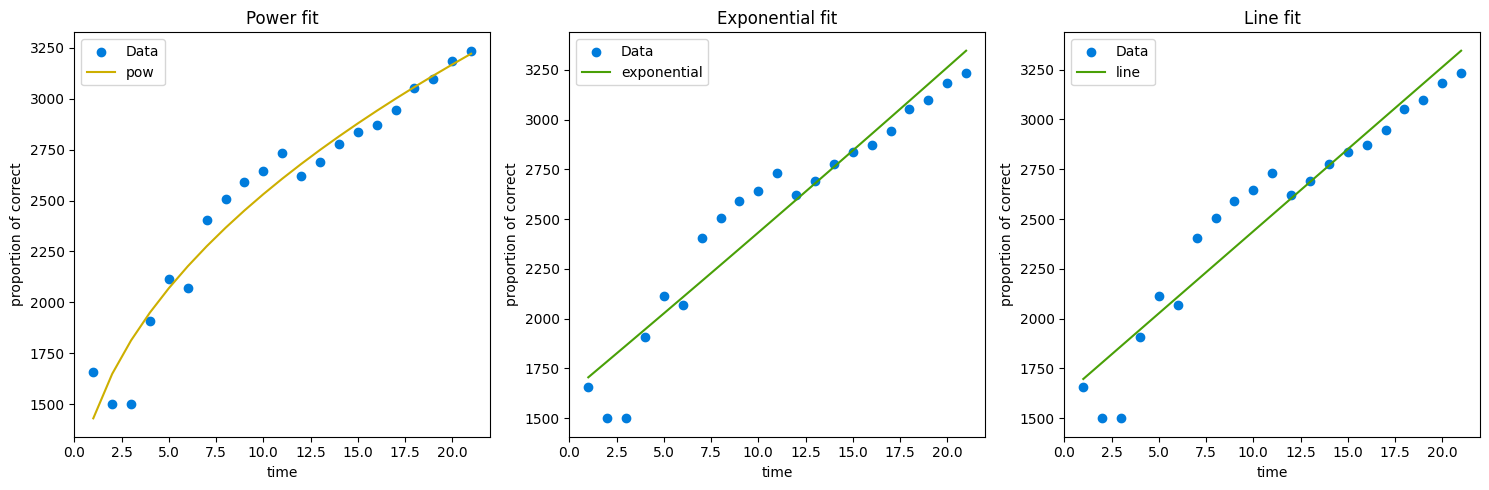

In [23]:
##독일
res=checking_model(Germany_year,Germany_value)
print()
print('-'*300)
print()
res_1_0=exp_coefficient(Germany_year1,Germany_value1)
res_2_0=exp_coefficient(Germany_year2,Germany_value2)
print(res_1_0,'\n',res_2_0)
print('difference of coefficient ( latter - former ) : ', res_2_0[0]-res_1_0[0])#,res_2[2]-res_1[2])
Germany_coeff=[res_2_0[0]-res_1_0[0]]

C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:11: RuntimeWarning: overflow encountered in power
  pred=w[0]*((t)**w[1])+w[2]
C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:12: RuntimeWarning: overflow encountered in square
  SSE=numpy.sum((y-pred)**2)
C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_line_LSE, 'r', label='line', color='#49A007')


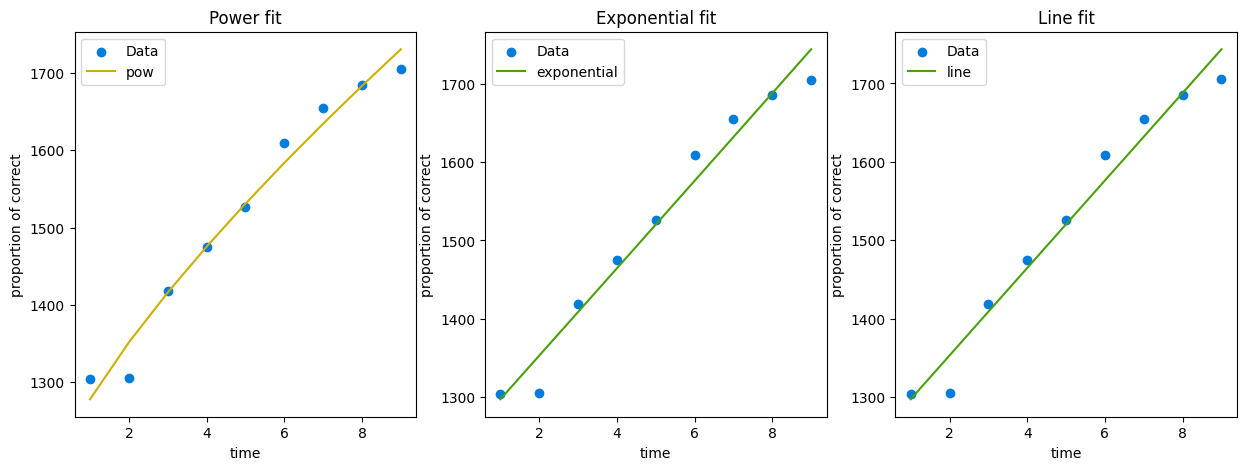

[Results in LSE] 
(1) Power function : 4559.988787
(2) Exponential function : 5664.362747
(3) Line function : 5623.772893
['1 : pow', '2 : line', '3 : exp']
coefficient of line :  [  55.80466408 1241.39001152]
coefficient of exp :  [ 5.97630611e+04  9.29210227e-04 -5.85211270e+04]
coefficient of pow :  [1.08086754e+02 7.49170930e-01 1.16994134e+03]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\659674656.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')


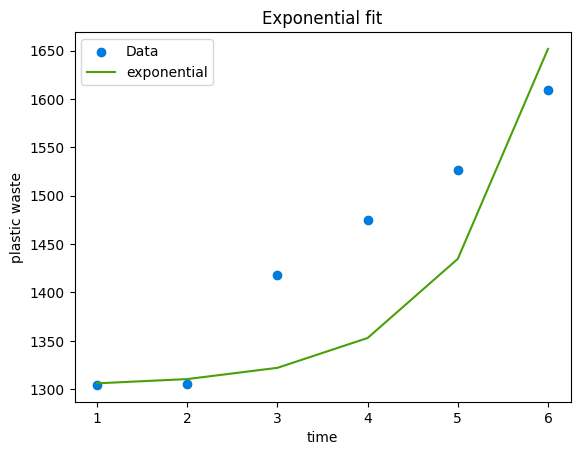

[Results in LSE] 
(1) Exp : 34367.248875
coefficient of exp_0 :  ! [0.97549638] ! 1304.46


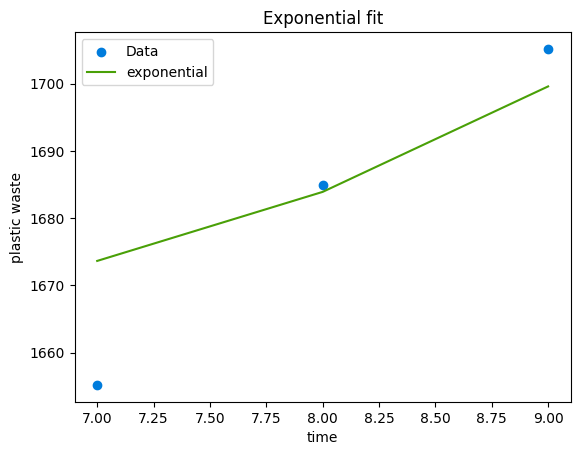

[Results in LSE] 
(1) Exp : 372.331930
coefficient of exp_0 :  ! [0.42395232] ! 1655.19
[0.9754963813033972] 
 [0.4239523187690792]
difference of coefficient ( latter - former ) :  -0.551544062534318


In [ ]:
##스페인
res=checking_model(Spain_year,Spain_value)
print()
print('-'*300)
print()
res_1_0=exp_coefficient(Spain_year1,Spain_value1)
res_2_0=exp_coefficient(Spain_year2,Spain_value2)
print(res_1_0,'\n',res_2_0)
print('difference of coefficient ( latter - former ) : ', res_2_0[0]-res_1_0[0])#,res_2[2]-res_1[2])
Spain_coeff=[res_2_0[0]-res_1_0[0]]

C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:11: RuntimeWarning: divide by zero encountered in power
  pred=w[0]*((t)**w[1])+w[2]
C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\1000973926.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_line_LSE, 'r', label='line', color='#49A007')


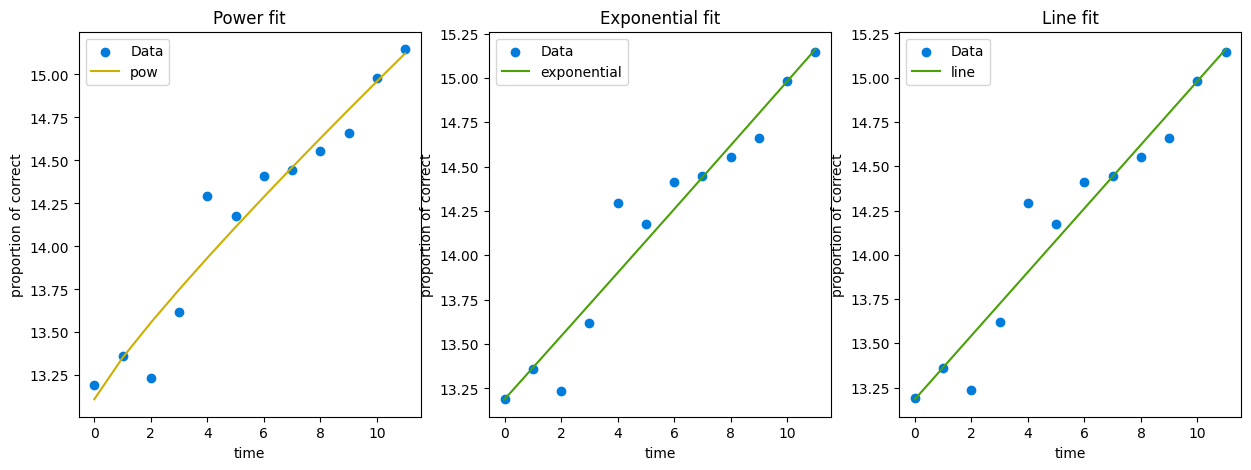

[Results in LSE] 
(1) Power function : 0.300533
(2) Exponential function : 0.315770
(3) Line function : 0.313749
['1 : pow', '2 : line', '3 : exp']
coefficient of line :  [ 0.17974024 13.18400937]
coefficient of exp :  [ 9.61865487e+01  1.84533147e-03 -8.29973151e+01]
coefficient of pow :  [ 0.24144797  0.88405989 13.11118187]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



C:\Users\johnl\AppData\Local\Temp\ipykernel_29568\659674656.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')


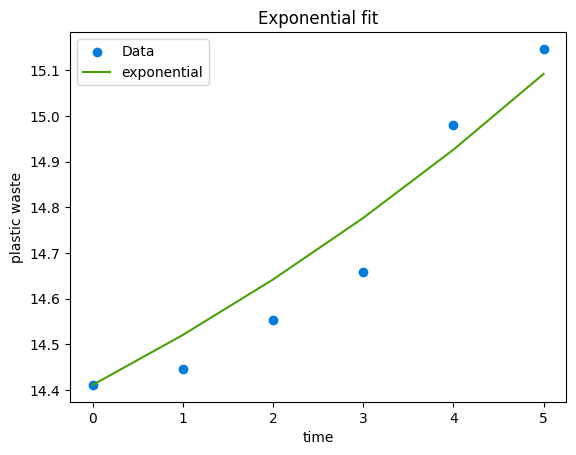

[Results in LSE] 
(1) Exp : 0.033218
coefficient of exp_0 :  ! [0.10391739] ! 14.411
[0.10391739065775202]


In [ ]:
##한국
res=checking_model(Korea_year,Korea_value)
print()
print('-'*300)
print()
res_1_0=exp_coefficient(Korea_year1,Korea_value1)
#res_2_0,res_2_1=exp_coefficient(Korea_year2,Korea_value2,res)
print(res_1_0)
#print('difference of coefficient ( latter - former ) : ', res_2_0[0]-res_1_0[0],res_2_1[0]-res_1_1[0])#,res_2[2]-res_1[2])
Korea_coeff=[res_1_0[0]]

머신러닝

In [21]:
data_df=pd.read_excel('country_excel.xlsx')
data_df['country']
'Kuwait '.strip().lower() == data_df['country'].apply(lambda x : x.strip())[0].lower()
#data_df['country'].apply(lambda x : x.strip())[0]

True

Kuwait
Plastic Production 


C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_line_LSE, 'r', label='line', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_out_LSE, 'r', label='line', color='#49A007')


[Results in LSE] 
(1) Power function : 7464.292293
(2) Exponential function : 7517.009278
(3) Line function : 7577.184149
['1 : pow', '2 : exp', '3 : line']
coefficient of line :  [ 13.65034756 867.9394084 ]
coefficient of exp :  [2.67483601e+02 3.92893035e-02 6.08173294e+02]
coefficient of pow :  [3.92120181e+01 6.41726577e-01 8.31408093e+02]
----------------------------------------------------------------------------------------------------


C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2023040997.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,1,1)
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2023040997.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')


[Results in LSE] 
(1) Exp : 11580.153846
coefficient of exp_0 :  ! [18.32307695] ! 830.0
[18.32307695] 
 []
production coefficient :  [18.32307695]
----------------------------------------------------------------------------------------------------
Plastic Consumption 
[Results in LSE] 
(1) Power function : 56.378171
(2) Exponential function : 78.828699
(3) Line function : 228.467366
['1 : pow', '2 : exp', '3 : line']
coefficient of line :  [  9.66083848 140.28788661]
coefficient of exp :  [9.11933227e+01 6.73266087e-02 5.79770325e+01]
coefficient of pow :  [  3.14009646   1.42451239 153.86395812]
----------------------------------------------------------------------------------------------------
[Results in LSE] 
(1) Exp : 1254.286154
coefficient of exp_0 :  ! [7.29538455] ! 161.0
[7.29538455] 
 []
consumption coefficient :  [7.29538455]
----------------------------------------------------------------------------------------------------
Lebanon
Plastic Production 
[Results in LSE] 
(1

KeyboardInterrupt: 

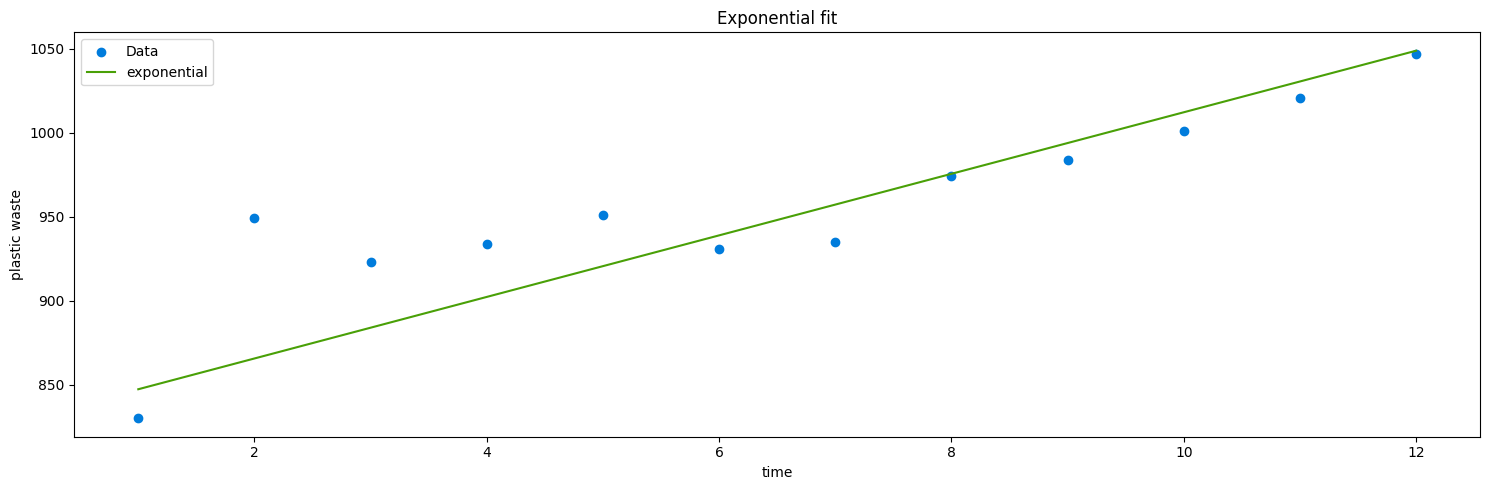

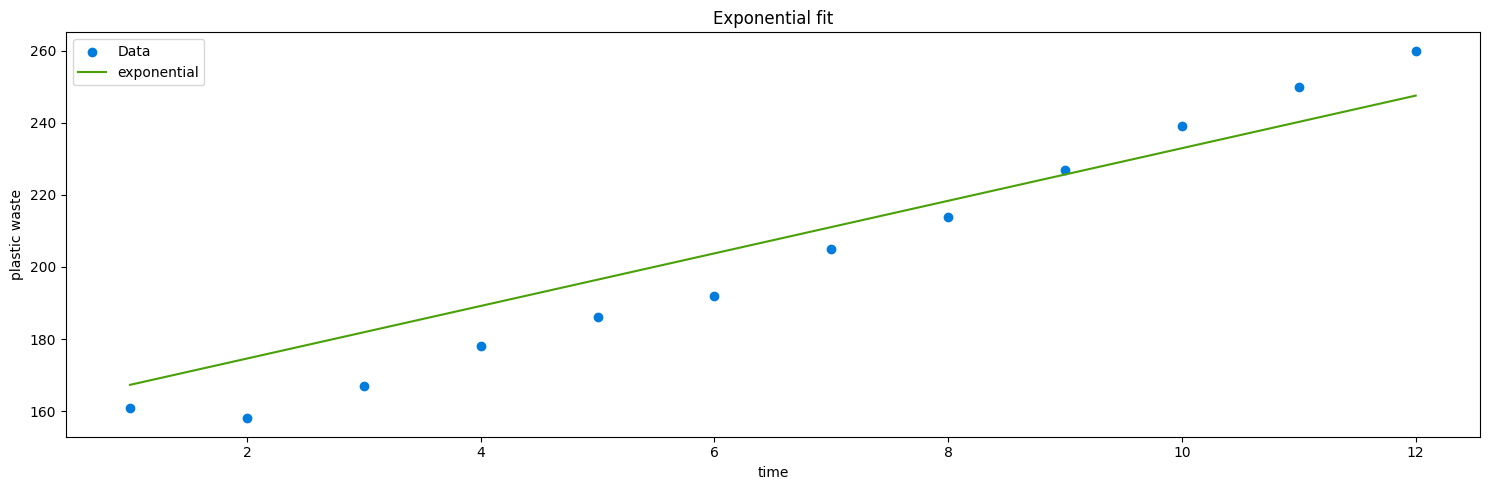

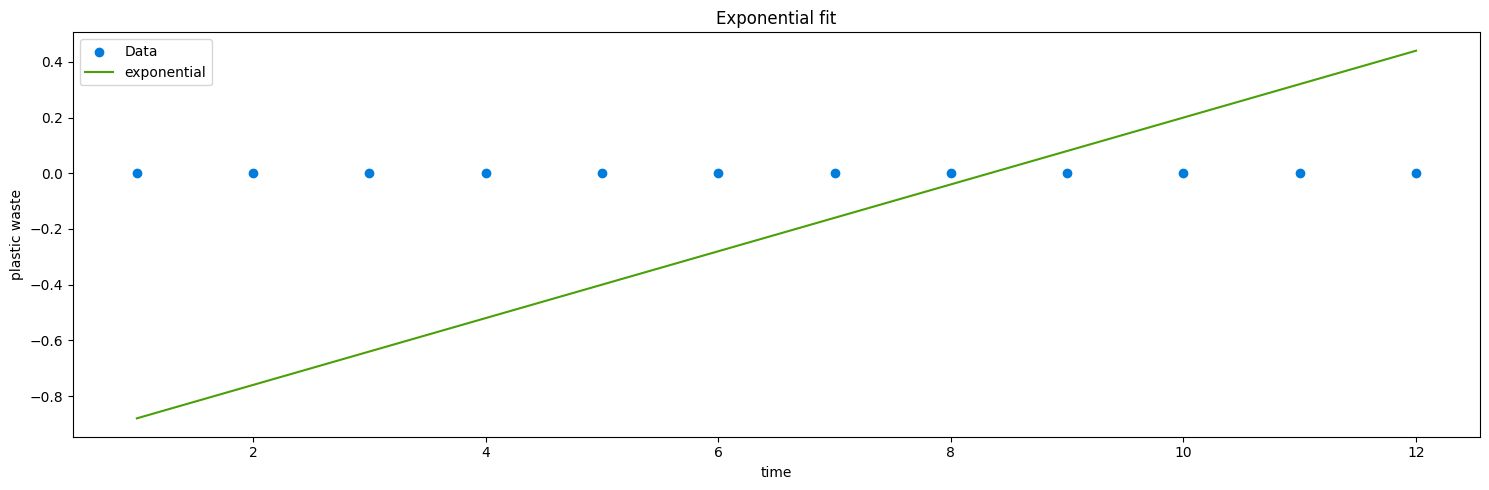

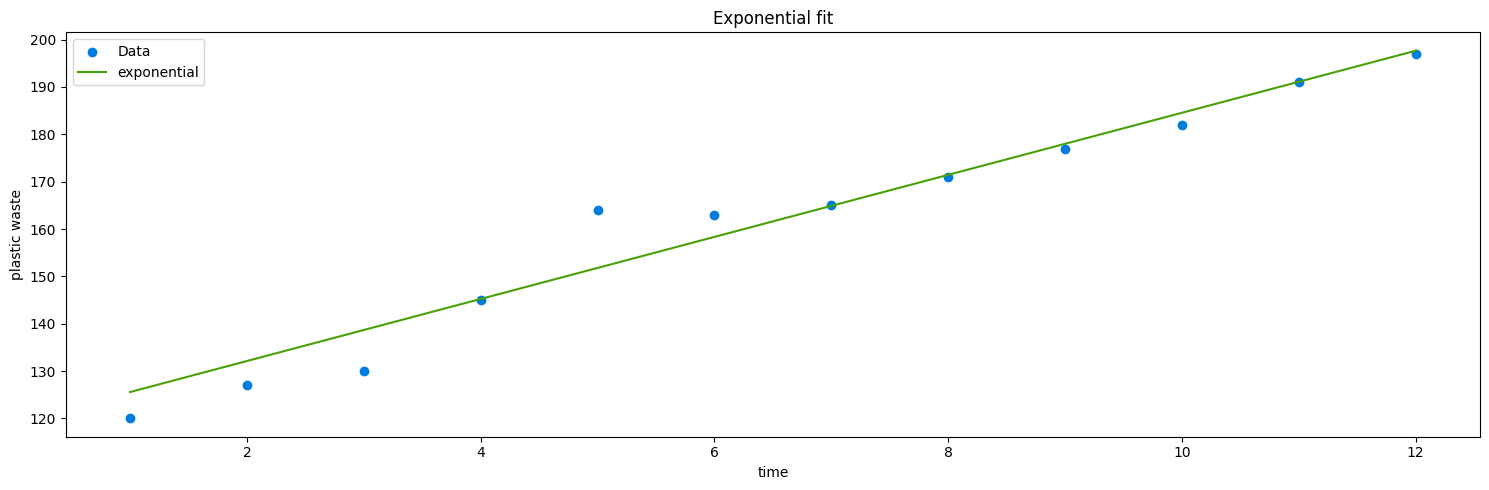

In [256]:
data_df=pd.read_excel('country_excel.xlsx')

#country_coeff=[showing_model(country) for country in country_list]

data=[]
process=[]
for i in range(len(data_df)):
    value_arr=data_df.values[i]
    for j in range(len(country_list)):
        if value_arr[0].strip().lower()==country_list[j][0].strip().lower():
            process.append(value_arr[0])
            country_list[j][1].set_trial_year(int(value_arr[2]))
            coeff=showing_model(country_list[j])
            data.append([value_arr[0].strip(), value_arr[1], value_arr[4], country_list[j][1].plastic_usage_per_captive, country_list[j][1].income_mean,value_arr[3],country_list[j][1].population, coeff[0][0], coeff[0][1], coeff[0][2], coeff[1][0], coeff[1][1], coeff[1][2], coeff[2][0], coeff[2][1]])            
            #country name, status, gdp, plastic usage per cative, income_mean, tax, population,coeff

df_all=pd.DataFrame(data,columns=['country','status','gdp','plastic_usage_per_cative','mean of income','tax','population','coeff_prod_before','coeff_prod_after','prod_state','coeff_cons_before','coeff_cons_after','cons_state','full_coeff_prod','full_coeff_cons'])
#df_all.to_csv('country_coeff.csv')

In [76]:
df_all[df_all.status=='T']

,Unnamed: 0,country,status,gdp,plastic_usage_per_cative,mean of income,tax,population,coeff_prod_before,coeff_prod_after,prod_state,coeff_cons_before,coeff_cons_after,cons_state,full_coeff_prod,full_coeff_cons
6,6,Netherland,T,46039,49.647667,838891.250000,0.300,16881.083333,[-5.12872195],[0.37604729],Ban/Tax,[0.27746306],[0.40583826],Ban/Tax,[0.7225394990312843],[0.6434219199121294]
10,10,Peru,T,7023,11.966417,382361.333333,0.030,31711.500000,[0.26463853],[0.08362366],Ban/Tax,[0.61320077],[0.27551946],Ban/Tax,[0.26110680354600463],[0.5999465962185331]
11,11,Poland,T,15468,26.413083,432339.988482,0.080,38024.000000,[0.65646227],[0.3243614],Ban/Tax,[0.76330816],[0.44301265],Ban/Tax,[0.6441652976058065],[0.7010894687443573]
23,23,Turkey,T,9121,20.138917,1.563000,0.045,77166.333333,[0.65340367],[0.29946812],Ban/Tax,[0.81793747],[0.45189227],Ban/Tax,[0.6380053487146463],[0.7687432747936589]
26,26,USA,T,48650,55.387083,17.824359,0.100,320911.000000,[-5.55111512e-17],[0.76916249],Ban/Tax,[-7.77156117e-16],[0.75481735],Ban/Tax,[0.9108755134997375],[0.8927260664365411]
35,35,Belgium,T,44760,43.489833,492146.000000,0.030,11294.833333,[],[0.56697589],None,[],[0.50783533],None,[0.7453568855670771],[0.6655832116772904]
49,49,Jordan,T,4231,12.186833,83028.000000,0.080,6768.833333,[0.12774029],[0.0443168],Ban/Tax,[0.62970116],[0.29261759],Ban/Tax,[0.08078007261031726],[0.5013322873079191]


In [185]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy
from sklearn.model_selection import train_test_split
df_all=pd.read_csv('country_coeff.csv')
#df=pd.DataFrame() ##독일, 스페인, 포르투갈의 gdp, plastic waste, coeff, tax 있는 데이터프레임
df=df_all[df_all['status']=='T']
df=df[df['prod_state']!='None']
df=df[df['cons_state']!='None']
df=df[df.gdp<45000]
print(df)
## production tax
x = df[['gdp','plastic_usage_per_cative','mean of income','tax','population']]
#print(numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_cons_before']]))
df['coeff_prod_ratio']=numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_prod_after']])/numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_prod_before']])
print(x)
print(([34757, korea_info.plastic_usage_per_captive, korea_info.income_mean, tax, korea_info.population]))
#df['coeff_prod_before']/df['coeff_prod_after']-1
y = df[['coeff_prod_ratio']]
tax_coeff_prod_ratio=y.mean()


#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x, y) 
tax_base=0.01
korea_coeff_prod=[]
korea_info=country_info(pd.read_csv('Korea Republic.csv'))
for i in range(1,100):
    tax=tax_base*i
    korea=numpy.array([34757, korea_info.plastic_usage_per_captive, korea_info.income_mean, tax, korea_info.population]).reshape(1, -1)#gdp,pw,coeff
    predict_korea=mlr.predict(korea)
    korea_coeff_prod.append(predict_korea)
print('KOREA PROD COEFF \n-*50\n',korea_coeff_prod)

## consumption tax
x = df[['gdp','plastic_usage_per_cative','mean of income','tax','population']]
df['coeff_cons_ratio']=numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_cons_after']])/numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_cons_before']])

#df['coeff_cons_ratio']=df['coeff_cons_before']/df['coeff_cons_after']-1
y = df[['coeff_cons_ratio']]
tax_coeff_cons_ratio=y.mean()


#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr1 = LinearRegression()
mlr1.fit(x,y) 
tax_base=0.01
korea_coeff_cons=[]
#korea_coeff=showing_model([korea_info.name,korea_info])
for i in range(1,100):
    tax=tax_base*i
    korea=[[34757,korea_info.plastic_usage_per_captive,korea_info.income_mean,tax,korea_info.population]]#gdp,pw,coeff
    predict_korea=mlr1.predict(korea)
    korea_coeff_cons.append(predict_korea)
print('KOREA PROD COEFF \n-*50\n',korea_coeff_cons)

    Unnamed: 0 country status    gdp  plastic_usage_per_cative  \
10          10    Peru      T   7023                240.750000   
11          11  Poland      T  15468                711.250000   
23          23  Turkey      T   9121                764.250000   
49          49  Jordan      T   4231                328.916667   

    mean of income    tax    population coeff_prod_before coeff_prod_after  \
10       11.966417  0.030  31711.500000      [0.26463863]     [0.08362367]   
11       26.413083  0.080  38024.000000      [0.65646232]     [0.32436139]   
23       20.138917  0.045  77166.333333      [0.65340368]     [0.29946812]   
49       12.186833  0.080   6768.833333      [0.12774023]     [0.04431676]   

   prod_state coeff_cons_before coeff_cons_after cons_state  \
10    Ban/Tax      [0.61320075]     [0.27551936]    Ban/Tax   
11    Ban/Tax       [0.7633082]     [0.44301249]    Ban/Tax   
23    Ban/Tax      [0.81793747]     [0.45189223]    Ban/Tax   
49    Ban/Tax      [0.6297

c:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

In [237]:
df_all

,Unnamed: 0,country,status,gdp,plastic_usage_per_cative,mean of income,tax,population,coeff_prod_before,coeff_prod_after,prod_state,coeff_cons_before,coeff_cons_after,cons_state,full_coeff_prod,full_coeff_cons
0,0,Kuwait,X,24811,495.500000,70.080833,-1.000,4072.250000,[0.47039802],[],None,[0.40309901],[],None,[0.6082287485162368],[0.4915294465974557]
1,1,Lebanon,X,3801,354.000000,18.078667,-1.000,4530.000000,[0.],[],None,[0.38538987],[],None,[-511.80205732359343],[0.46937053759511915]
2,2,Libya,X,7614,100.333333,19.393250,-1.000,6301.833333,[-3.11727432],[],None,[-2.66088941],[],None,[0.23617009377625203],[0.3724620114781396]
3,3,Malaysia,B,9040,743.166667,25.792417,-1.000,30818.750000,[0.],[-5.08005005],Ban/Tax,[-2.44249065e-15],[0.58086133],Ban/Tax,[0.6662324310993668],[0.6875527077087793]
4,4,Mexico,B,9271,432.833333,17.400000,-1.000,126068.333333,[7.77156117e-16],[0.64027981],Ban/Tax,[-2.66453526e-15],[0.64931906],Ban/Tax,[0.7330895380479945],[0.758499251654748]
5,5,Morocco,B,2896,179.500000,8.071250,-1.000,33330.333333,[0.42502488],[0.12591076],Ban/Tax,[0.72822909],[0.40668486],Ban/Tax,[0.3800037647842292],[0.5815226552958651]
6,6,Netherland,T,46039,875.583333,49.647667,0.300,16881.083333,[-5.12872345],[0.37604715],Ban/Tax,[0.27746304],[0.4058383],Ban/Tax,[0.722539497343067],[0.6434219548431819]
7,7,Nigeria,B,2229,58.500000,5.922417,-1.000,177087.250000,[0.58068917],[0.20923492],Ban/Tax,[0.67030935],[0.36152295],Ban/Tax,[0.547649426880483],[0.636006049453067]
8,8,Oman,B,16823,565.916667,44.248833,-1.000,3688.250000,[],[0.57791512],None,[],[0.43996248],None,[0.6033535484555153],[0.49856799770482063]
9,9,Pakistan,B,1208,63.166667,5.008917,-1.000,185108.916667,[1.06845365],[0.38217639],Ban/Tax,[1.27921552],[0.573461],Ban/Tax,[0.5473827886088964],[0.6470206616208423]


In [147]:
df_all=pd.read_csv('country_coeff.csv')
#df=pd.DataFrame() ##독일, 스페인, 포르투갈의 gdp, plastic waste, coeff, tax 있는 데이터프레임
df=df_all[df_all['status']=='T']
df=df[df['prod_state']!='None']
df=df[df['cons_state']!='None']
df=df[df.gdp<45000]
#df.loc(23['mean of income']*=1000000
df

C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1804844442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.country=='Turkey']['mean of income']*=1000000


,Unnamed: 0,country,status,gdp,plastic_usage_per_cative,mean of income,tax,population,coeff_prod_before,coeff_prod_after,prod_state,coeff_cons_before,coeff_cons_after,cons_state,full_coeff_prod,full_coeff_cons
10,10,Peru,T,7023,11.966417,382361.333333,0.030,31711.500000,[0.26463853],[0.08362366],Ban/Tax,[0.61320077],[0.27551946],Ban/Tax,[0.26110680354600463],[0.5999465962185331]
11,11,Poland,T,15468,26.413083,432339.988482,0.080,38024.000000,[0.65646227],[0.3243614],Ban/Tax,[0.76330816],[0.44301265],Ban/Tax,[0.6441652976058065],[0.7010894687443573]
23,23,Turkey,T,9121,20.138917,1.563000,0.045,77166.333333,[0.65340367],[0.29946812],Ban/Tax,[0.81793747],[0.45189227],Ban/Tax,[0.6380053487146463],[0.7687432747936589]
49,49,Jordan,T,4231,12.186833,83028.000000,0.080,6768.833333,[0.12774029],[0.0443168],Ban/Tax,[0.62970116],[0.29261759],Ban/Tax,[0.08078007261031726],[0.5013322873079191]


korea
Plastic Production 


C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:11: RuntimeWarning: overflow encountered in power
  pred=w[0]*((t)**w[1])+w[2]
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:12: RuntimeWarning: overflow encountered in square
  SSE=numpy.sum((y-pred)**2)
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:11: RuntimeWarning: overflow encountered in multiply
  pred=w[0]*((t)**w[1])+w[2]
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE, 'r', label='exponential', color='#49A007')
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2457411018.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(m

[Results in LSE] 
(1) Power function : 294594.783490
(2) Exponential function : 314237.002383
(3) Line function : 313749.082751
['1 : pow', '2 : line', '3 : exp']
coefficient of line :  [  179.73776135 13004.28789062]
coefficient of exp :  [ 3.92392240e+05  4.56647886e-04 -3.79386577e+05]
coefficient of pow :  [3.45513039e+02 7.70920299e-01 1.27503955e+04]
----------------------------------------------------------------------------------------------------


C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1854783261.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,1,1)
C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\1854783261.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')


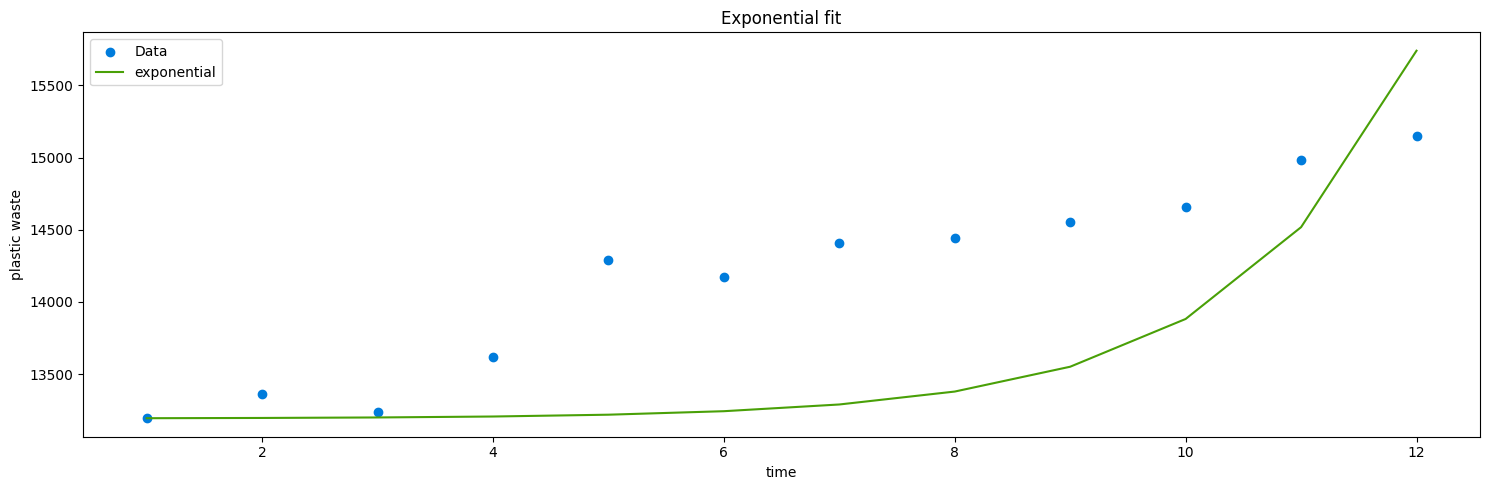

[Results in LSE] 
(1) Exp : 6796266.962304
coefficient of exp_0 :  ! [0.65359843] ! 13193.0
[0.65359843] 
 []
production coefficient :  [0.65359843]
----------------------------------------------------------------------------------------------------
Plastic Consumption 
[Results in LSE] 
(1) Power function : 32542.340111
(2) Exponential function : 54577.005894
(3) Line function : 54309.446387
['1 : pow', '2 : line', '3 : exp']
coefficient of line :  [ 177.1013985  5458.92423778]
coefficient of exp :  [ 5.21267677e+05  3.38978240e-04 -5.15807740e+05]
coefficient of pow :  [3.59504309e+02 7.54155757e-01 5.18037613e+03]
----------------------------------------------------------------------------------------------------


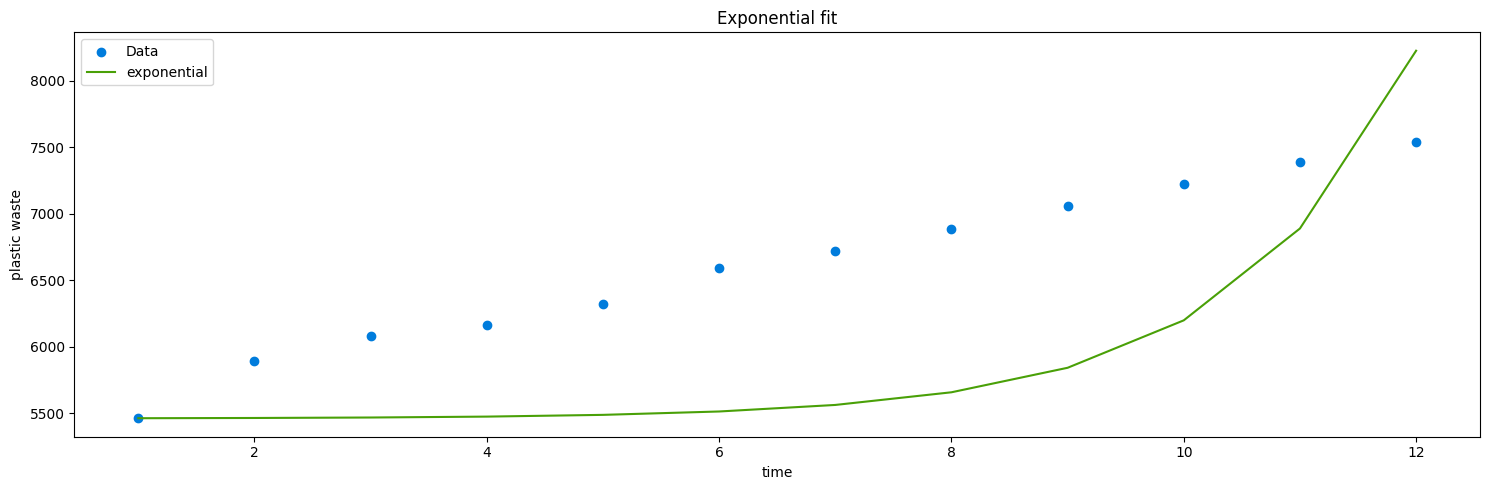

[Results in LSE] 
(1) Exp : 9012792.116129
coefficient of exp_0 :  ! [0.66051462] ! 5460.0
[0.66051462] 
 []
consumption coefficient :  [0.66051462]
----------------------------------------------------------------------------------------------------


[[array([0.65359843]), [], 'None'],
 [array([0.66051462]), [], 'None'],
 [[0.8277258550607545], [0.7701411737597714]]]

In [192]:
a=showing_model(('korea',korea_info))
a

In [188]:
print(korea_coeff_prod[39],'\n','-'*50,'\n',korea_coeff_cons[39])

[[0.75411308]] 
 -------------------------------------------------- 
 [[0.78008825]]


In [239]:
df_all=pd.read_csv('country_coeff.csv')
df_all['full_coeff_prod_num']=numpy.array([float(x.strip('[').strip(']')) for x in df_all['full_coeff_prod']])
df_all['full_coeff_cons_num']=numpy.array([float(x.strip('[').strip(']')) for x in df_all['full_coeff_cons']])
df_all=df_all[df_all.full_coeff_prod_num > 0]
df_all=df_all[df_all.full_coeff_cons_num>0]
#df_all=df_all.T
df_all['full_coeff_prod_num'].mean()
#df_all[df_all.status=='T']
#df_all.to_csv('country_coeff_num.csv')

0.5785529251481998

In [220]:
df=df_all[df_all['status']=='T']
df=df[df['prod_state']!='None']
df=df[df['cons_state']!='None']
df=df[df.gdp<45000]
df['coeff_prod_before_num']=numpy.array([float(x.strip('[]')) for x in df['coeff_prod_before']])
df['coeff_prod_after_num']=numpy.array([float(x.strip('[]')) for x in df['coeff_prod_after']])
df['coeff_cons_before_num']=numpy.array([float(x.strip('[]')) for x in df['coeff_cons_before']])
df['coeff_cons_after_num']=numpy.array([float(x.strip('[]')) for x in df['coeff_cons_after']])
df['time']=numpy.array(['before' for x in range(len(df))])
df['coeff_cons_ratio']=numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_cons_after']])/numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_cons_before']])
df['coeff_prod_ratio']=numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_prod_after']])/numpy.array([float(x.strip('[').strip(']')) for x in df['coeff_prod_before']])

#df['coeff_prod_num']=df['coeff_prod_before_num']
#df['coeff_cons_num']=df['coeff_cons_before_num']
#df1=df.__deepcopy__()
#df['coeff_prod_num']=df['coeff_prod_after_num']
#df['coeff_cons_num']=df['coeff_prod_after_num']
#df1['time']=numpy.array(['after' for x in range(len(df))])
#df=pd.concat([df,df1])
#df
tax_coeff_prod_ratio=df['coeff_prod_ratio'].mean()
tax_coeff_cons_ratio=df['coeff_cons_ratio'].mean()
print(tax_coeff_prod_ratio,tax_coeff_cons_ratio)
#df.to_csv('Tax country coeff.csv')

0.40383650625494555 0.511717176347298


0.5785529251481998 0.40383650625494555 0.2690335911184941


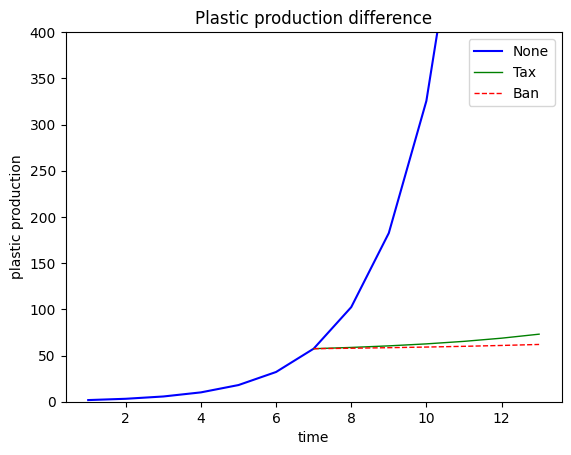

In [252]:
##production
df_X=df_all[df_all['status']=='X']
M1=numpy.array([float(x.strip('[').strip(']')) for x in df_X['full_coeff_prod']]).mean()
#print(M1)
df_T=df_all[df_all['status']=='T']
#M2=numpy.array([float(x.strip('[').strip(']')) for x in df_T['full_coeff_prod']]).mean()
M2=tax_coeff_prod_ratio
df_B=df_all[df_all['status']=='B']
#M3=numpy.array([float(x.strip('[').strip(']')) for x in df_B['full_coeff_prod']]).mean()
M3=ban_coeff_prod_ratio
M1=0.5785529251481998
print(M1,M2,M3)
plt.plot(numpy.arange(1,14),[numpy.exp(M1*i) for i in range(1,14)],'b-')

plt.plot(numpy.arange(7,14),[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7) for i in range(7,14)],'g-',linewidth=1)

plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3*(i))+numpy.exp(M1*7)-numpy.exp(M1*M3*7) for i in range(7,14)],color='red',linestyle="--",linewidth=1)
plt.title('Plastic production difference')
plt.xlabel('time')
plt.ylabel('plastic production')
plt.legend(['None','Tax','Ban'])
plt.ylim([0,400])
plt.show()


0.1 0.40383650625494555 0.2690335911184941


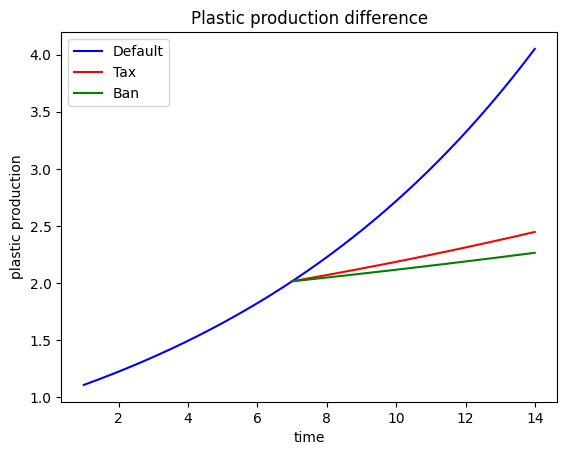

In [298]:
##production
df_X=df_all[df_all['status']=='X']
M1=numpy.array([float(x.strip('[').strip(']')) for x in df_X['full_coeff_prod']]).mean()
df_T=df_all[df_all['status']=='T']
#M2=numpy.array([float(x.strip('[').strip(']')) for x in df_T['full_coeff_prod']]).mean()
M2=tax_coeff_prod_ratio
df_B=df_all[df_all['status']=='B']
#M3=numpy.array([float(x.strip('[').strip(']')) for x in df_B['full_coeff_prod']]).mean()
M3=ban_coeff_prod_ratio
M1=0.1
print(M1,M2,M3)
plt.plot(numpy.arange(100,1400)/100,[numpy.exp(M1*i) for i in numpy.arange(100,1400)/100],'b-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7) for i in numpy.arange(700,1400)/100],'r-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M3*(i))+numpy.exp(M1*7)-numpy.exp(M1*M3*7) for i in numpy.arange(700,1400)/100],'g-')
plt.title('Plastic production difference')
plt.xlabel('time')
plt.ylabel('plastic production')
plt.legend(['Default','Tax','Ban'])
#plt.ylim([0,2000])
plt.show()

0.1 0.511717176347298 0.4565665701306025


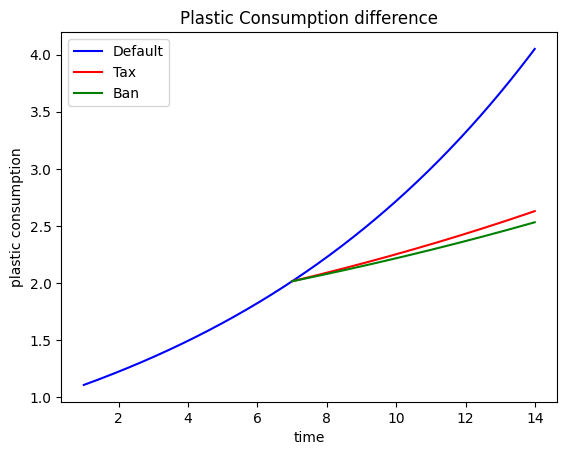

In [299]:
##consumption
df_X=df_all[df_all['status']=='X']
M1=numpy.array([float(x.strip('[').strip(']')) for x in df_X['full_coeff_cons']]).mean()
df_T=df_all[df_all['status']=='T']
#M2=numpy.array([float(x.strip('[').strip(']')) for x in df_T['full_coeff_prod']]).mean()
M2=tax_coeff_cons_ratio
df_B=df_all[df_all['status']=='B']
#M3=numpy.array([float(x.strip('[').strip(']')) for x in df_B['full_coeff_prod']]).mean()
M3=ban_coeff_cons_ratio
M1=0.1
print(M1,M2,M3)
plt.plot(numpy.arange(100,1400)/100,[numpy.exp(M1*i) for i in numpy.arange(100,1400)/100],'b-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7) for i in numpy.arange(700,1400)/100],'r-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M3*(i))+numpy.exp(M1*7)-numpy.exp(M1*M3*7) for i in numpy.arange(700,1400)/100],'g-')
plt.title('Plastic Consumption difference')
plt.xlabel('time')
plt.ylabel('plastic consumption')
plt.legend(['Default','Tax','Ban'])
#plt.ylim([0,3000])
plt.show()

In [51]:
##production _ korea estimation
M1=korea_coeff[0][0]
df_T=df_all[df_all['status']=='T']
M2=df_T['coeff_prod'].mean()
df_B=df_all[df_all['status']=='B']
M3=df_T['coeff_prod'].mean()

plt.plot(numpy.arange(1,14),[numpy.exp(M1)*i for i in range(1,14)],'b-')

plt.plot(numpy.arange(7,14),[numpy.exp(M1*M2)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'r-')

plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
plt.xlabel('time')
plt.ylabel('plastic production')
plt.legend(['None','Tax','Ban'])
plt.show()

NameError: name 'korea_coeff' is not defined

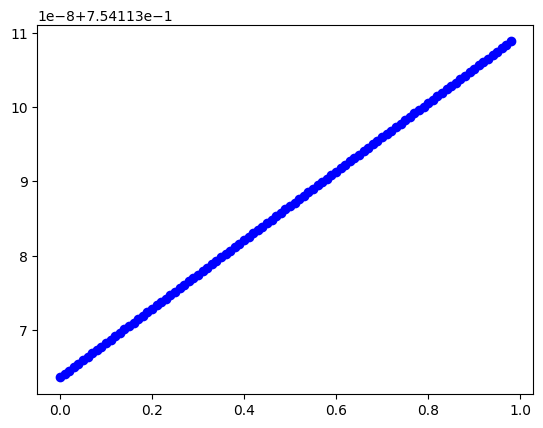

In [186]:
##production _ korea estimation
M1=korea_coeff_prod
M1=[x[0][0] for x in M1]
M1
# df_T=df_all[df_all['status']=='T']
# M2=df_T['coeff_prod'].mean()
# df_B=df_all[df_all['status']=='B']
# M3=df_T['coeff_prod'].mean()

plt.plot(numpy.arange(99)/100,M1,'b-')
plt.plot(numpy.arange(99)/100,M1,'bo',linewidth=0.1)
plt.show()
#diff=[M1[x+1]-M1[x] for x in range(98)]
#maximum=max(diff)
#diff.index(maximum)
# plt.plot(numpy.arange(7,14),[numpy.exp(M1*M2)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'r-')

# plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
# plt.xlabel('time')
# plt.ylabel('plastic production')
# plt.legend(['None','Tax','Ban'])
#plt.show()

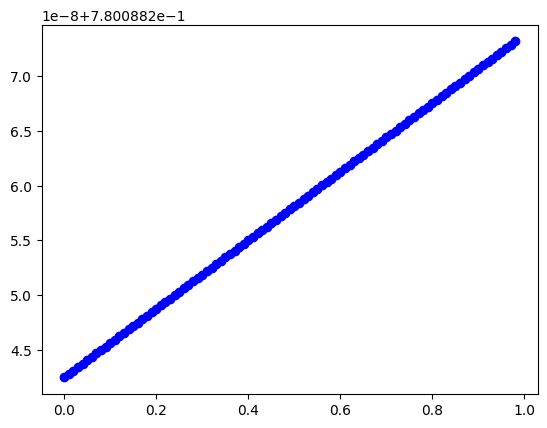

In [187]:
##production _ korea estimation
M1=korea_coeff_cons
M1=[x[0][0] for x in M1]
M1
# df_T=df_all[df_all['status']=='T']
# M2=df_T['coeff_prod'].mean()
# df_B=df_all[df_all['status']=='B']
# M3=df_T['coeff_prod'].mean()

plt.plot(numpy.arange(99)/100,M1,'b-')
plt.plot(numpy.arange(99)/100,M1,'bo',linewidth=0.1)
plt.show()
#diff=[M1[x+1]-M1[x] for x in range(98)]
#maximum=max(diff)
#diff.index(maximum)
# plt.plot(numpy.arange(7,14),[numpy.exp(M1*M2)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'r-')

# plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
# plt.xlabel('time')
# plt.ylabel('plastic production')
# plt.legend(['None','Tax','Ban'])
#plt.show()

In [259]:
prod_start=korea_info.plasitc_production[0]
cons_start=korea_info.plasitc_consumption[0]
cons_start

5460.0

[0.65359843] [0.75411308]


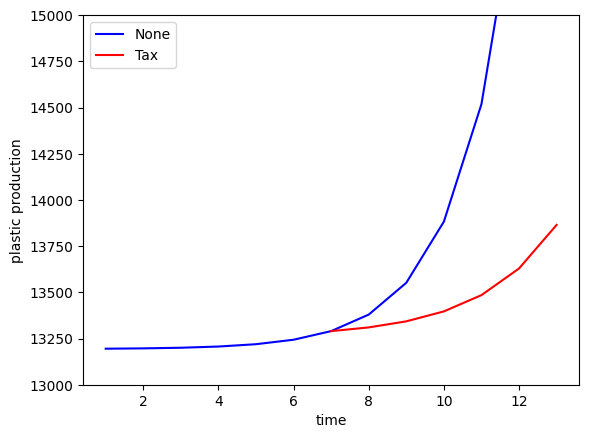

array([[0.        ],
       [0.28541045],
       [0.5708209 ],
       [0.85623136],
       [1.14164181],
       [1.42705226],
       [1.71246271]])

In [249]:
##production _ korea estimation
M1=a[0][0]
M2=korea_coeff_prod[39][0]
print(M1,M2)
plt.plot(numpy.arange(1,14),[numpy.exp(M1*i)+prod_start for i in range(1,14)],'b-')

plt.plot(numpy.arange(7,14),[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+prod_start for i in range(7,14)],'r-')

#plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
plt.xlabel('time')
plt.ylabel('plastic production')
plt.legend(['None','Tax','Ban'])
plt.ylim([13000,15000])
plt.show()
numpy.array([numpy.exp(M1)*i for i in range(7,14)])-numpy.array([numpy.exp(M1*M2)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)])

[Results in LSE] 
(1) Exp : 189480263.745454
coefficient of exp_0 :  ! [7704.3090609] ! 64081


C:\Users\johnl\AppData\Local\Temp\ipykernel_11996\2023040997.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_exp_LSE_0, 'r', label='exponential', color='#49A007')


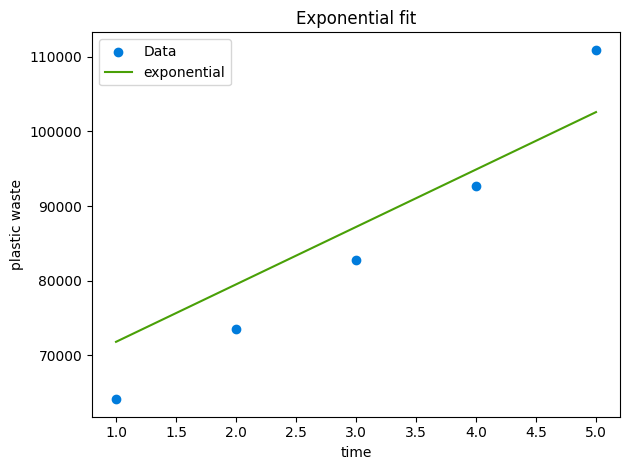

In [288]:
indexs=[11,1111]
result=exp_coefficient(numpy.arange(1,6),[64081,73501,82763,92695,110957])

In [289]:
result

array([7704.3090609])

0.8277258550607545 0.754113081618544


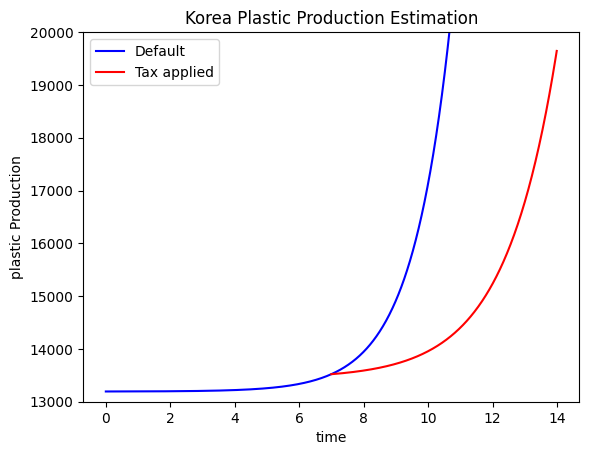

354.4816308076679 1194.4245989121246 3170.162125351095


In [314]:
##production_ korea estimation
M1=a[2][0][0]
#M1=result[0]
M2=korea_coeff_prod[39][0][0]
print(M1,M2)

plt.plot(numpy.arange(1,1400)/100,[numpy.exp(M1*i)+prod_start for i in numpy.arange(1,1400)/100],'b-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+prod_start for i in numpy.arange(700,1400)/100],'r-')

#plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
plt.xlabel('time')
plt.ylabel('plastic Production')
plt.legend(['Default','Tax applied'])
plt.title('Korea Plastic Production Estimation')
plt.ylim([13000,20000])
plt.show()
diff_array_prod=numpy.array([numpy.exp(M1*i)+prod_start for i in numpy.arange(700,1400)/100])-numpy.array([numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+prod_start for i in numpy.arange(700,1400)/100])
print(diff_array_prod[100],diff_array_prod[200],diff_array_prod[300])

0.7701411737597714 0.7800882546956291
1.0


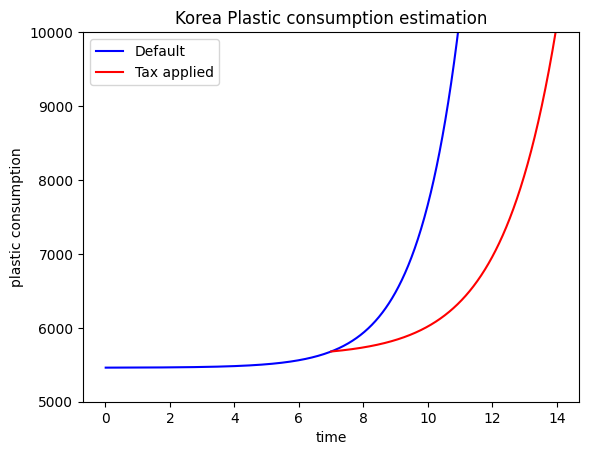

199.3243447991572 648.4620582268417 1652.5181707994088


In [321]:
##consumption _ korea estimation
M1=a[2][1][0]
M2=korea_coeff_cons[39][0][0]
print(M1,M2)
print((numpy.arange(1,1400)/100)[0]*100)
plt.plot(numpy.arange(1,1400)/100,[numpy.exp(M1*i)+cons_start for i in numpy.arange(1,1400)/100],'b-')

plt.plot(numpy.arange(700,1400)/100,[numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+cons_start for i in numpy.arange(700,1400)/100],'r-')

#plt.plot(numpy.arange(7,14),[numpy.exp(M1*M3)*(i-7)+numpy.exp(M1)*7 for i in range(7,14)],'g-')
plt.xlabel('time')
plt.ylabel('plastic consumption')
plt.legend(['Default','Tax applied'])
plt.title('Korea Plastic consumption estimation')
plt.ylim([5000,10000])
plt.show()
diff_array_prod=numpy.array([numpy.exp(M1*i)+prod_start for i in numpy.arange(700,1400)/100])-numpy.array([numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+prod_start for i in numpy.arange(700,1400)/100])
print(diff_array_prod[100],diff_array_prod[200],diff_array_prod[300])
#diff_array_cons=numpy.array([numpy.exp(M1*i)+cons_start for i in numpy.arange(700,1400)/100])-numpy.array([numpy.exp(M1*M2*(i))+numpy.exp(M1*7)-numpy.exp(M1*M2*7)+cons_start for i in numpy.arange(700,1400)/100])
#diff_array_cons
#print(diff_array_cons[100],diff_array_cons[200],diff_array_cons[300])

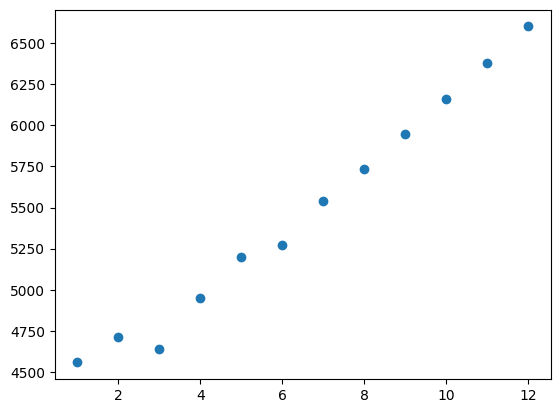

In [308]:
df_1=pd.read_csv('data/Mexico.csv')
plt.plot(numpy.arange(1,13),df_1.values[1][2:]*1000,'o')


In [ ]:
korea_coeff_cons

NameError: name 'korea_coeff_cons' is not defined